In [1]:
from ScenarioHeatMap.SHM import *
def demo_1():
    """
    # 无底图使用，无底图时必须图片给定长宽
    :return:
    """
    data = [[50, 50], [20, 20]]  # 热力点坐标
    hm = HeatMap(data, width=100, height=100)  # width是宽即x轴
    hm.data_transform([0, 0,100, 100])
    hm.heatmap()
    max_color, min_color = hm.get_max_min_heat()

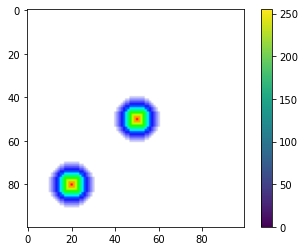

In [2]:
demo_1()

<AxesSubplot:>

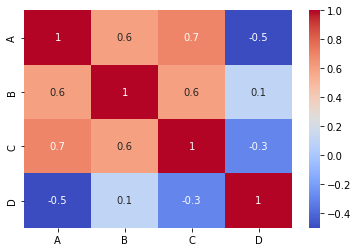

In [3]:
import seaborn as sns
import pandas as pd
# 创建一个数据框
df = pd.DataFrame({'A':[1, 2, 3, 4, 5],
                  'B':[2, 3, 1, 5, 4],
                  'C':[3, 1, 2, 4, 5],
                  'D':[4, 5, 1, 2, 3]})
# 计算相关系数
corr = df.corr()
# 绘制热力图
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [4]:
import cv2
import numpy as np
from PIL import Image
from pyheatmap.heatmap import HeatMap
import matplotlib.pyplot as plt

In [5]:
def apply_heatmap(image, data):
    """image是原图，data是坐标"""
    """创建一个新的与原图大小一致的图像，color为0背景为黑色。这里olor为0背景为黑色。这里这样做是因为在绘制热力图的时候如果不选择背景图，画出来的图与原图大小不一致（根据点的坐标来的），导致无法对热力图和原图进行加权叠加，因此，这里我新建了一张背景图。"""
    background = Image.new("RGB", (image.shape[1], image.shape[0]), color=0)
    #开始绘制热度图
    hm = HeatMap(data)
    hit_img = hm.heatmap(base=background, r=100) # background为背景图片，r为半径，默认为10
    hit_img = cv2.cvtColor(np.asarray(hit_img), cv2.COLOR_RGB2BGR) # Image格式转换成cv2格式
    overlay = image.copy()
    alpha = 0.5 #设置覆盖图片的透明度
    cv2.rectangle(overlay, (0, 0), (image.shape[1], image.shape[0]), (255, 0, 0), -1) # 设置蓝色为热度图基本蓝色
    image = cv2.addWeighted(overlay, alpha, image, 1-alpha, 0) # 将背景热度图覆盖到原图
    image = cv2.addWeighted(hit_img, alpha, image, 1-alpha, 0) # 将热度图覆盖到原图
    return image
    

In [6]:
# import cv2
# img = cv2.imread("./person.jpg")
# cv2.namedWindow("image")
# while(1):
#     cv2.imshow("image", img)
#     if cv2.waitKey()&0xFF==ord('q'):
#         break
# cv2.destroyAllWindows()

In [7]:
"""利用opencv获取图像中像素点坐标"""
import cv2
img = cv2.imread('./person.jpg')

def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event==cv2.EVENT_LBUTTONDOWN:
        xy = "%d, %d" % (x, y)
        print(x, y)
        cv2.circle(img, (x, y), 2, (0, 0, 255))
        cv2.putText(img, xy, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.0, (0, 0, 255))
        cv2.imshow("image", img)
        
cv2.namedWindow("image")
cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
while(1):
    cv2.imshow("image", img)
    key = cv2.waitKey(5)&0xFF
    if key == ord('q'):
        break
cv2.destroyAllWindows()

In [8]:
data = [[512, 290], [359, 301], [321, 240], [288, 248], [253, 198], [187, 231], [187, 160],
       [201, 121], [70, 209], [96, 176], [84, 101], [100, 66], [111, 16]]

In [9]:
image = apply_heatmap(img, data)

In [10]:
while(1):
    cv2.imshow("image", image)
    if cv2.waitKey()&0xFF==ord('q'):
        break
cv2.destroyAllWindows()

In [11]:
image.shape

(400, 586, 3)